In [246]:
import numpy as np
class Point:
    def __init__(self, x=0, y=0):
        self.x = int(x)
        self.y = int(y)
    def __eq__(self, other):
        return self.x == other.x and self.y == other.y
    def __hash__(self):
        return self.x*10000+self.y
    def __ne__(self, other):
        return not self.__eq__(other)
    

In [247]:
pathToMap = 'build/map.txt'

import csv
with open(pathToMap, 'rb') as csvfile:
    map = list(csv.reader(csvfile, delimiter=',', quotechar='|'))
for col in range(len(map)):
    for row in range(len(map[col])):
        map[col-1][row-1] = int(map[col-1][row-1])

In [248]:
pathToPath = 'build/path.txt'
with open(pathToPath,'rb') as csvfile:
    path = list(csv.reader(csvfile,delimiter=','))
start = Point(path[1][1],path[1][2])
second = Point(path[2][1],path[2][2])
end = Point(path[-1][1],path[-1][2])
print("Start: "+`start`)
print("End: "+`end`)

Start: <__main__.Point instance at 0x10f49b7a0>
End: <__main__.Point instance at 0x10dcd9368>


In [249]:
import sys
from itertools import izip
from math import sqrt
INFINITY = sys.maxint
xWidth = len(map)
yHeight = len(map[0])
def Distance(start,end):
    #return sqrt((start.x-end.x)*(start.x-end.x)+(start.y-end.y)*((start.y-end.y)))/10
    return abs(start.x-end.x)+abs(start.y-end.y)

def ReplayPath(cameFrom,current,start):
    total_path = [current]
    pos = current
    #print("x: "+ `pos.x`+" y: "+`pos.y`) 
    while not pos == start:
        pos = cameFrom[pos.x][pos.y]
        total_path.append(pos)
        #print("x: "+ `pos.x`+" y: "+`pos.y`) 
    return total_path

def sort(discoveredNodes,fscore):
    lowest = INFINITY
    lowestItem = None
    for item in discoveredNodes:
        score = fscore[item.x][item.y]
        if (lowest > score):
            lowest = score
            lowestItem = item
    return lowestItem
     
def AStar(map,start,end,function=lambda a,b: 0):
    #The set of currently discovered nodes still to be evaluated.
    #Initially, only the start node is known.
    discoveredNodes = set()
    discoveredNodes.add(start)
    #For each node, which node it can most efficiently be reached from.
    #If a node can be reached from many nodes, cameFrom will eventually contain the
    #most efficient previous step.
    previousposition = [[0 for y in range(yHeight)] for x in range(xWidth)] 
    gscore = [[0 for y in range(yHeight)] for x in range(xWidth)] 
    fscore = [[0 for y in range(yHeight)] for x in range(xWidth)] 
    visitedNodeMap = [[False for y in range(yHeight)] for x in range(xWidth)] 
    discoveredNodeMap = [[False for y in range(yHeight)] for x in range(xWidth)] 
    for col in range(xWidth):
        for row in range(len(map[col])):
            gscore[col-1][row-1] = INFINITY
            fscore[col-1][row-1] = INFINITY
    gscore[start.x][start.y] = 0
    fscore[start.x][start.y] = Distance(start, end)
    while(len(discoveredNodes)>0):
        
        currentNode = sort(discoveredNodes,fscore)
        if (currentNode == end):
            return(ReplayPath(previousposition,end,start))
            #output path
        discoveredNodes.remove(currentNode)
        discoveredNodeMap[currentNode.x][currentNode.y] = False
        visitedNodeMap[currentNode.x][currentNode.y] = True
        points = set([Point(max(currentNode.x-1,0),currentNode.y),
                  Point(min(xWidth-1,currentNode.x+1),currentNode.y),
                  Point(currentNode.x,min(currentNode.y+1,yHeight-1)),
                  Point(currentNode.x,max(currentNode.y-1,0))])
        for point in points:
            if visitedNodeMap[point.x][point.y] == False:
                # The distance from start to a neighbor
                #print("x: "+ `point.x`+" y: "+`point.y`) 
                newGScore = gscore[currentNode.x][currentNode.y] + map[point.x][point.y]
                if discoveredNodeMap[point.x][point.y] == False:
                    discoveredNodeMap[point.x][point.y] = True
                    discoveredNodes.add(point)
                if newGScore < gscore[point.x][point.y]:
                    previousposition[point.x][point.y] = currentNode
                    gscore[point.x][point.y] = newGScore
                    fscore[point.x][point.y] = newGScore + function(start,end)
    raise LookupError("Could not find solution")
import cProfile, pstats, StringIO
pr = cProfile.Profile()
pr.enable()

print("Finding route from 1 to 2")
a = AStar(map,start,second,lambda a,b:Distance(a,b))
print("Finding route from 1 to last")
b = AStar(map,start,end)
print("Finding route from top left to bottom right")
c = AStar(map,Point(0,0),Point(xWidth-1,yHeight-1))

pr.disable()
s = StringIO.StringIO()
sortby = 'cumulative'
ps = pstats.Stats(pr, stream=s).sort_stats(sortby)
ps.print_stats()
print s.getvalue()

Finding route from 1 to 2
Finding route from 1 to last
Finding route from top left to bottom right
         392162 function calls in 1.425 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        7    0.000    0.000    1.424    0.203 /usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2855(run_code)
        3    0.432    0.144    1.419    0.473 <ipython-input-249-4aa445560db3>:31(AStar)
    18401    0.753    0.000    0.753    0.000 <ipython-input-249-4aa445560db3>:21(sort)
        1    0.003    0.003    0.687    0.687 <ipython-input-249-4aa445560db3>:85(<module>)
        1    0.002    0.002    0.610    0.610 <ipython-input-249-4aa445560db3>:81(<module>)
        1    0.001    0.001    0.127    0.127 <ipython-input-249-4aa445560db3>:83(<module>)
    73594    0.085    0.000    0.085    0.000 <ipython-input-246-967df0f6dd1a>:3(__init__)
   110727    0.052    0.000    0.052    0.000 <ipython-input-246-967df0

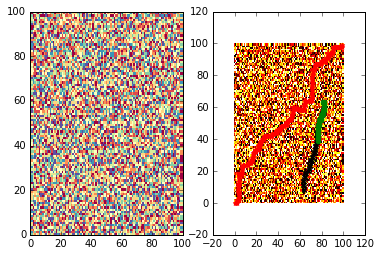

In [250]:
%matplotlib inline
def column(matrix, i):
    return [row[i] for row in matrix]

import matplotlib.pyplot as plt
xa = np.array([row.x for row in a])
ya = np.array([row.y for row in a])
xb = np.array([row.x for row in b])
yb = np.array([row.y for row in b])
xc = np.array([row.x for row in c])
yc = np.array([row.y for row in c])
plt.subplot(1,2, 1)
heatmap = plt.pcolor(map,cmap='Spectral')
plt.subplot(1, 2, 2)
plt.pcolor(map,cmap='hot')
plt.scatter(xa, ya,marker='x',color='k')
plt.scatter(xb, yb,marker='o',color='g')
plt.scatter(xc, yc,marker='*',color='r')
plt.show()
